In [1]:
import sys
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

sys.path.insert(1, '/Users/madisonthantu/Desktop/DREAM/T-RECS-RS-research')
from src.chaney_utils import *

In [2]:
results_paths = {
    'repeated_training': ['sim_results/simulation1/repeated_training'],
    'single_training': ['sim_results/simulation1/single_training']
}
num_sims = 1

""" 
RESULTS: Repeated training 
"""
results_files = ["sim_results.pkl"] * num_sims

repeated_training_results = merge_results(results_paths['repeated_training'], results_files)
metric_keys = list(repeated_training_results.keys())
model_keys = list(repeated_training_results[metric_keys[0]].keys())
num_simulations = len(repeated_training_results[metric_keys[0]][model_keys[0]])
num_timesteps = len(repeated_training_results[metric_keys[0]][model_keys[0]][0])

print("Metric keys:\n\t", len(metric_keys), metric_keys)
print("Model keys:\n\t", len(model_keys), model_keys)
print(f"No. simulations = {num_simulations}")
print(f"No. timesteps/sim = {num_timesteps}")

all_results = {'repeated_training':repeated_training_results}

""" 
RESULTS: Single training  
"""
results_files = ["sim_results.pkl"] * num_sims
single_training_results = merge_results(results_paths['single_training'], results_files)
all_results['single_training'] = single_training_results

Metric keys:
	 20 ['mse', 'interaction_spread', 'global_interaction_similarity', 'inter_cluster_interaction_similarity', 'intra_cluster_interaction_similarity', 'mean_global_cosine_sim', 'mean_intra_cluster_cosine_sim', 'mean_inter_cluster_cosine_sim', 'mean_cosine_sim_per_cluster', 'mean_cluster_distance_from_centroid', 'mean_global_distance_from_centroid', 'mean_distance_from_centroid_per_cluster', 'interaction_histogram', 'rmse', 'mean_novelty', 'mean_slate_topic_diversity', 'topic_interaction_histogram', 'topic_interaction_spread', 'mse_per_user', 'user_distance_from_cluster_centroid']
Model keys:
	 9 ['baseline_myopic', 'repeated_items_repeat_interactions', 'probabilistic', 'random', 'random_interleaving', 'xquad_binary_0.1', 'xquad_binary_0.25', 'xquad_smooth_0.1', 'xquad_smooth_0.25']
No. simulations = 1
No. timesteps/sim = 100


In [3]:
""" 
ENVIRONMENT: Repeated training 
"""
# environment_file = ["sim_environment.pkl"]
# environments_repeated_training = merge_results(results_paths, environment_file)

""" 
DIAGNOSTICS: Repeated training 
"""
# diagnostics_file = ["sim_diagnostics.pkl"]
# diagnostics_repeated_training = merge_results(results_paths, environment_file)

' \nDIAGNOSTICS: Repeated training \n'

In [4]:
id_to_readable = {
    'baseline_myopic':'Myopic',
    'repeated_items_repeat_interactions':'Repeatable',
    'probabilistic':'Probabilistic',
    'random':'Random',
    'random_interleaving':'Random Interleaving',
    'xquad_binary_0.1':'xQuaD Binary (α=0.1)',
    'xquad_binary_0.25':'xQuaD Binary (α=0.25)',
    'xquad_smooth_0.1':'xQuaD Smooth (α=0.1)',
    'xquad_smooth_0.25':'xQuaD Smooth (α=0.25)',
}

y_labels = dict([
    ("mse", "MSE"), 
    ("interaction_spread", "item interaction spread"), 
    ("global_interaction_similarity", "average jacard similarity"), 
    ("inter_cluster_interaction_similarity", "average jacard similarity"), 
    ("intra_cluster_interaction_similarity", "average jacard similarity"), 
    ("mean_global_cosine_sim", "average cosine sim"),
    ("mean_intra_cluster_cosine_sim", "average cosine sim"),
    ("mean_inter_cluster_cosine_sim", "average cosine sim"),
    ("mean_cosine_sim_per_cluster", "average cosine sim"),
    ("mean_cluster_distance_from_centroid", "distance"),
    ("mean_global_distance_from_centroid", "distance"),
    ("mean_distance_from_centroid_per_cluster", "distance"),
    ("interaction_histogram", "No. interactions per item"),
    ("rmse", "rmse"),
    ("mean_novelty", "Novelty"),
    ("mean_slate_topic_diversity", "Topic Diversity"),
    ("topic_interaction_histogram", "No. interactions per topic"),
    ("topic_interaction_spread", "topic interaction spread"),
    ("mse_per_user", "mse per user"),
    ("user_distance_from_cluster_centroid", "distance")
])

metric_to_readable = {
    'mse':'Mean Squared Error',
    'mean_novelty':'Mean Novelty',
    'mean_slate_topic_diversity':'Mean Topic Diversity per Recommendation Slate'
}

training_to_readable = {
    'single_training':'Single Training',
    'repeated_training':'Repeated Training'
}

var_list = ['repeated_training', 'single_training']

In [5]:
xquad_keys = [
    'xquad_binary_0.1',
    'xquad_binary_0.25',
    'xquad_smooth_0.1',
    'xquad_smooth_0.25',
]

# Graphing `mse`

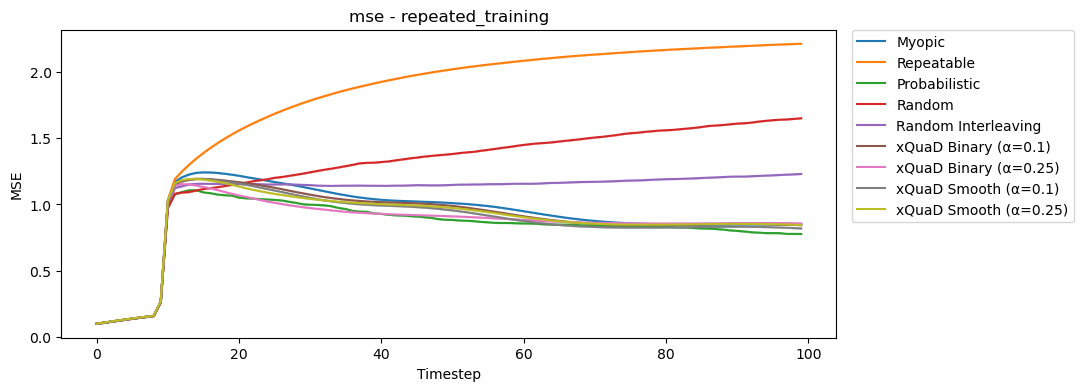

In [6]:
metric = "mse"

num_plots = len(model_keys)
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

graph_metrics_by_axis(axs, all_results[var_list[0]], metric, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs.set_ylabel(y_labels[metric])
axs.set_xlabel("Timestep")
axs.set_title(f"{metric} - {var_list[0]}")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

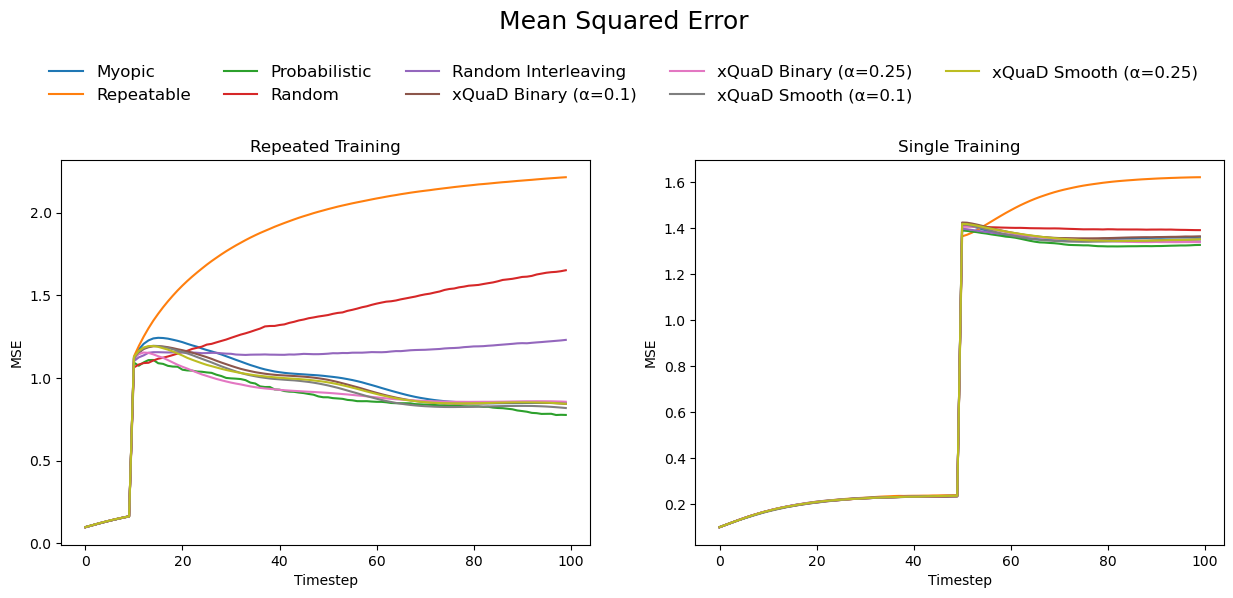

In [7]:
def graph_metrics_by_training(train_results, metric_key, model_keys, label_map, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_params"):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    legend_lines, legend_names = [], []
    for m in model_keys:
        for idx, training_type in enumerate(['repeated_training', 'single_training']):
            if not isinstance(train_results[training_type][metric_key][m], np.ndarray):
                train_results[training_type][metric_key][m] = np.array(train_results[training_type][metric_key][m])
            values = train_results[training_type][metric_key][m].mean(axis=0)
            line, = axs[idx].plot(values)
            legend_names.append(label_map[m])
            legend_lines.append(line)
            axs[idx].set_title(training_to_readable[training_type])
            axs[idx].set_xlabel('Timestep')
            axs[idx].set_ylabel(y_labels[metric_key])
    fig.legend(legend_lines[::2],
               legend_names[::2],
               loc='upper center',
               fontsize=12,
               frameon=False,
               ncol=5,
               bbox_to_anchor=(.5, 1.1))
    fig.suptitle(metric_to_readable[metric_key], y=1.18, fontsize=18)

metric = "mse"

graph_metrics_by_training(all_results, metric, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")

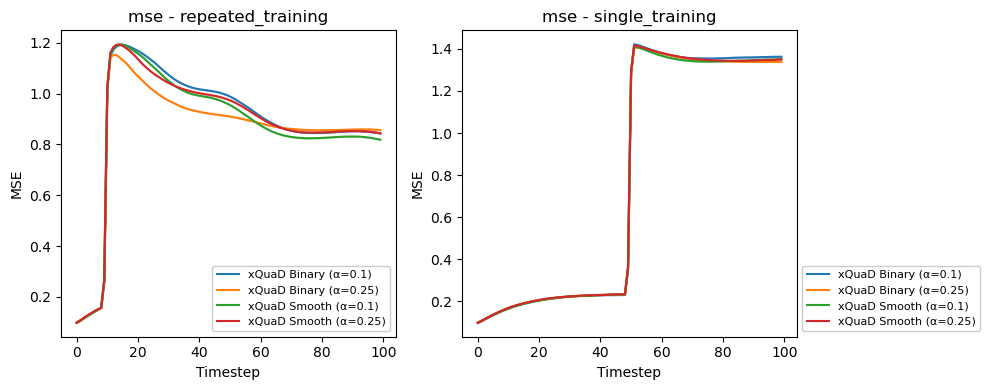

In [8]:
metric = "mse"

num_plots = len(model_keys)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

graph_metrics_by_axis(axs[0], all_results[var_list[0]], metric, xquad_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[0].set_ylabel(y_labels[metric])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric} - {var_list[0]}")
axs[0].legend(facecolor='white', framealpha=1, loc='best', bbox_to_anchor=(1, 0.25), fontsize="8",)

graph_metrics_by_axis(axs[1], all_results[var_list[1]], metric, xquad_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[1].set_ylabel(y_labels[metric])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric} - {var_list[1]}")
axs[1].legend(facecolor='white', framealpha=1, loc='best', bbox_to_anchor=(1, 0.25), fontsize="8",)

plt.tight_layout()

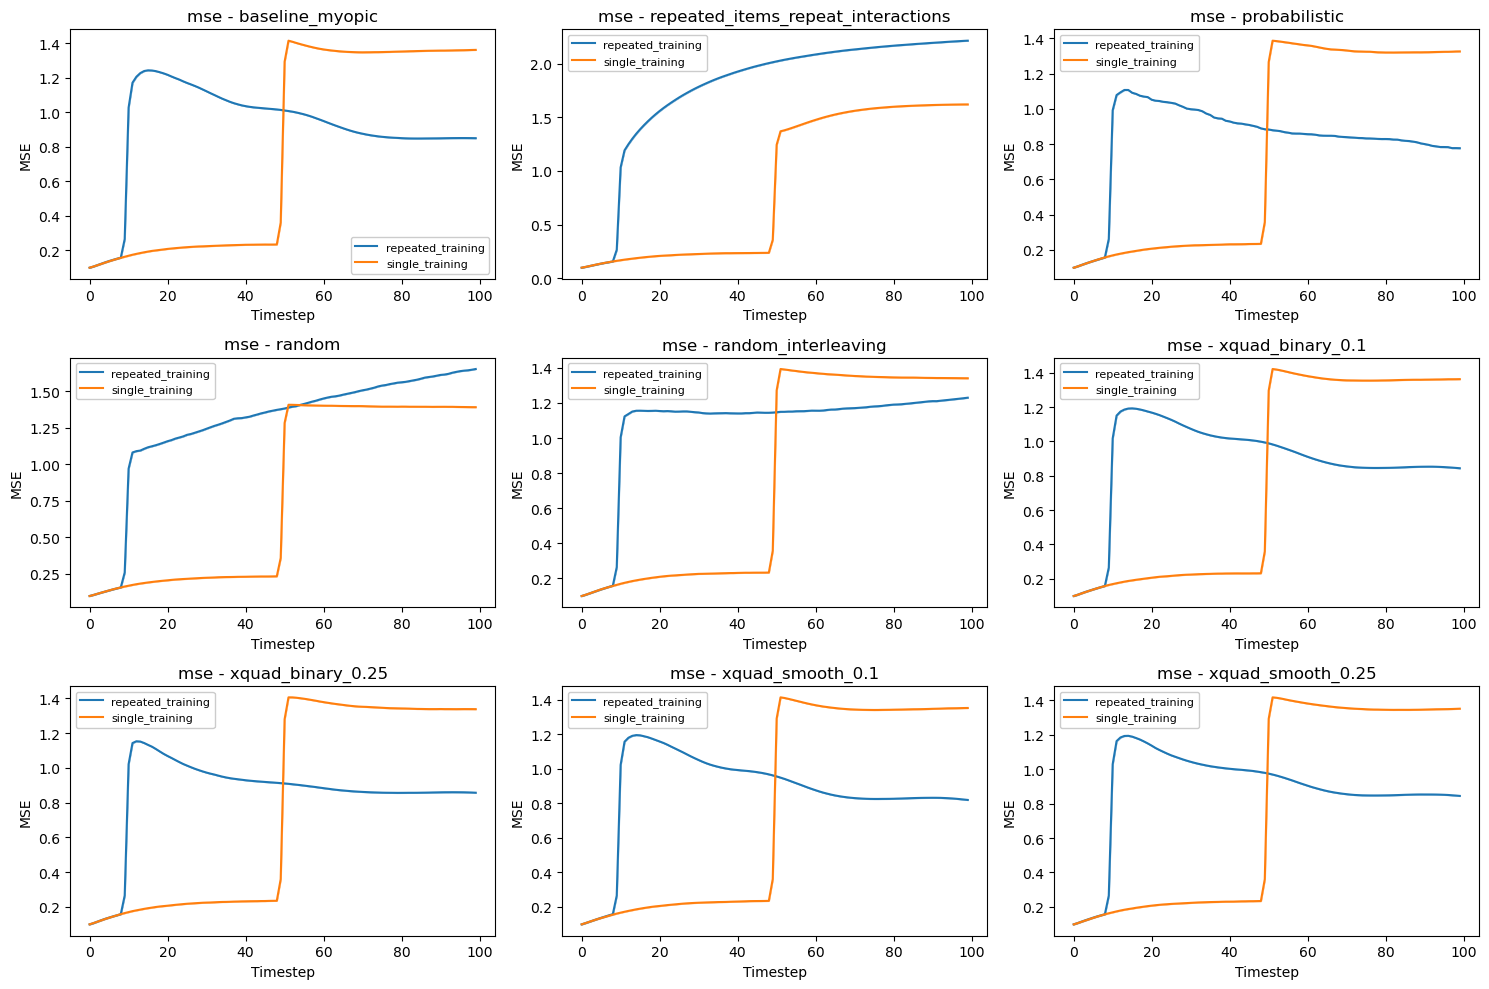

In [9]:
metric = "mse"

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    
    graph_metrics_by_axis(curr_ax, all_results[var_list[0]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label=var_list[0])
    graph_metrics_by_axis(curr_ax, all_results[var_list[1]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label=var_list[1])
    curr_ax.set_ylabel(y_labels[metric])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{metric} - {model_key}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

# RMSE

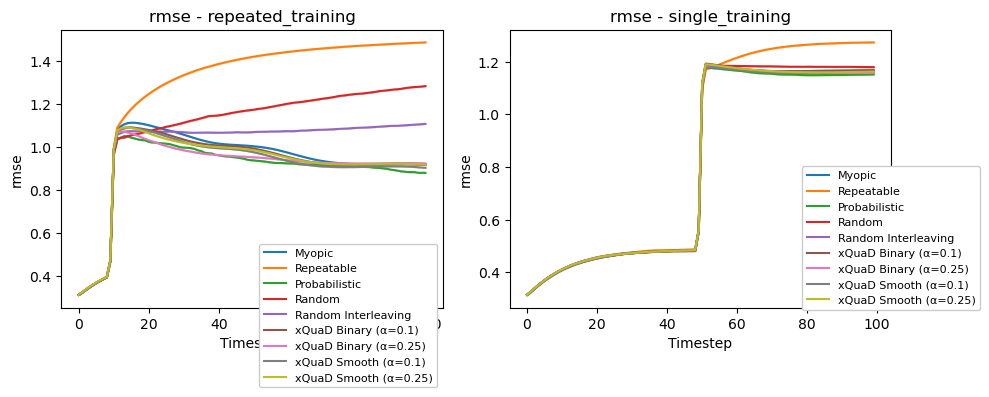

In [10]:
metric = "rmse"

num_plots = len(model_keys)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

graph_metrics_by_axis(axs[0], all_results[var_list[0]], metric, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[0].set_ylabel(y_labels[metric])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric} - {var_list[0]}")
axs[0].legend(facecolor='white', framealpha=1, loc='best', bbox_to_anchor=(1, 0.25), fontsize="8",)

graph_metrics_by_axis(axs[1], all_results[var_list[1]], metric, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[1].set_ylabel(y_labels[metric])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric} - {var_list[1]}")
axs[1].legend(facecolor='white', framealpha=1, loc='center', bbox_to_anchor=(1, 0.25), fontsize="8",)

plt.tight_layout()

# Graphing `cosine similarity`

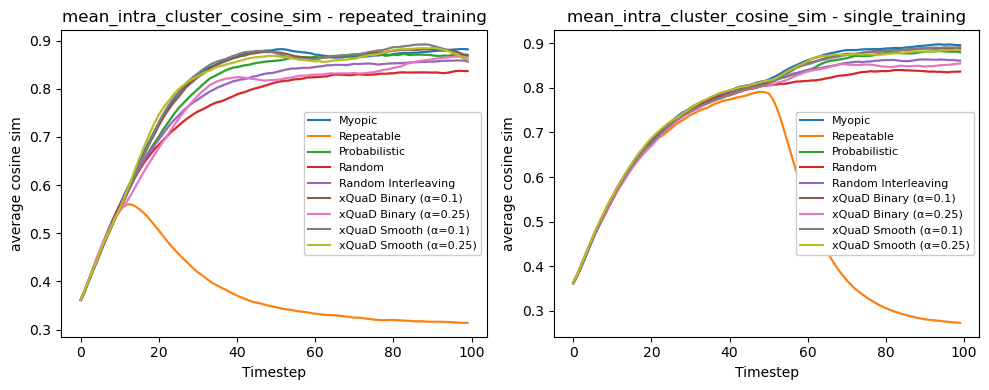

In [11]:
metric = "mean_intra_cluster_cosine_sim"

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

graph_metrics_by_axis(axs[0], all_results[var_list[0]], metric, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[0].set_ylabel(y_labels[metric])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric} - {var_list[0]}")
axs[0].legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

graph_metrics_by_axis(axs[1], all_results[var_list[1]], metric, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[1].set_ylabel(y_labels[metric])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric} - {var_list[1]}")
axs[1].legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

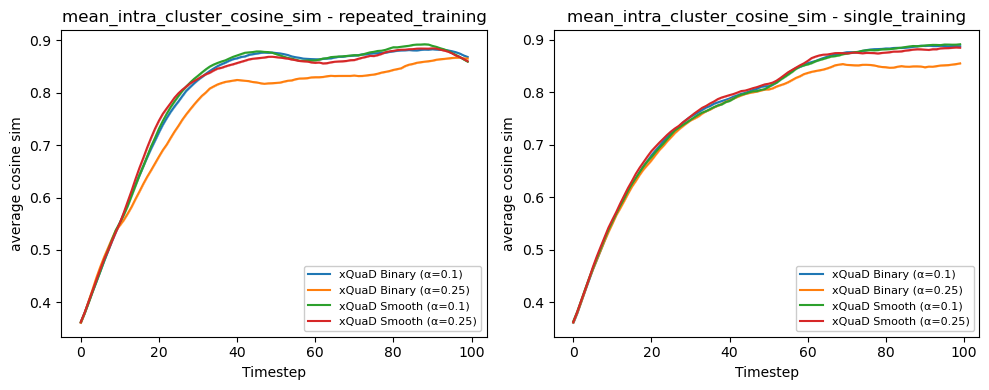

In [12]:
metric = "mean_intra_cluster_cosine_sim"

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

graph_metrics_by_axis(axs[0], all_results[var_list[0]], metric, xquad_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[0].set_ylabel(y_labels[metric])
axs[0].set_xlabel("Timestep")
axs[0].set_title(f"{metric} - {var_list[0]}")
axs[0].legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

graph_metrics_by_axis(axs[1], all_results[var_list[1]], metric, xquad_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")
axs[1].set_ylabel(y_labels[metric])
axs[1].set_xlabel("Timestep")
axs[1].set_title(f"{metric} - {var_list[1]}")
axs[1].legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

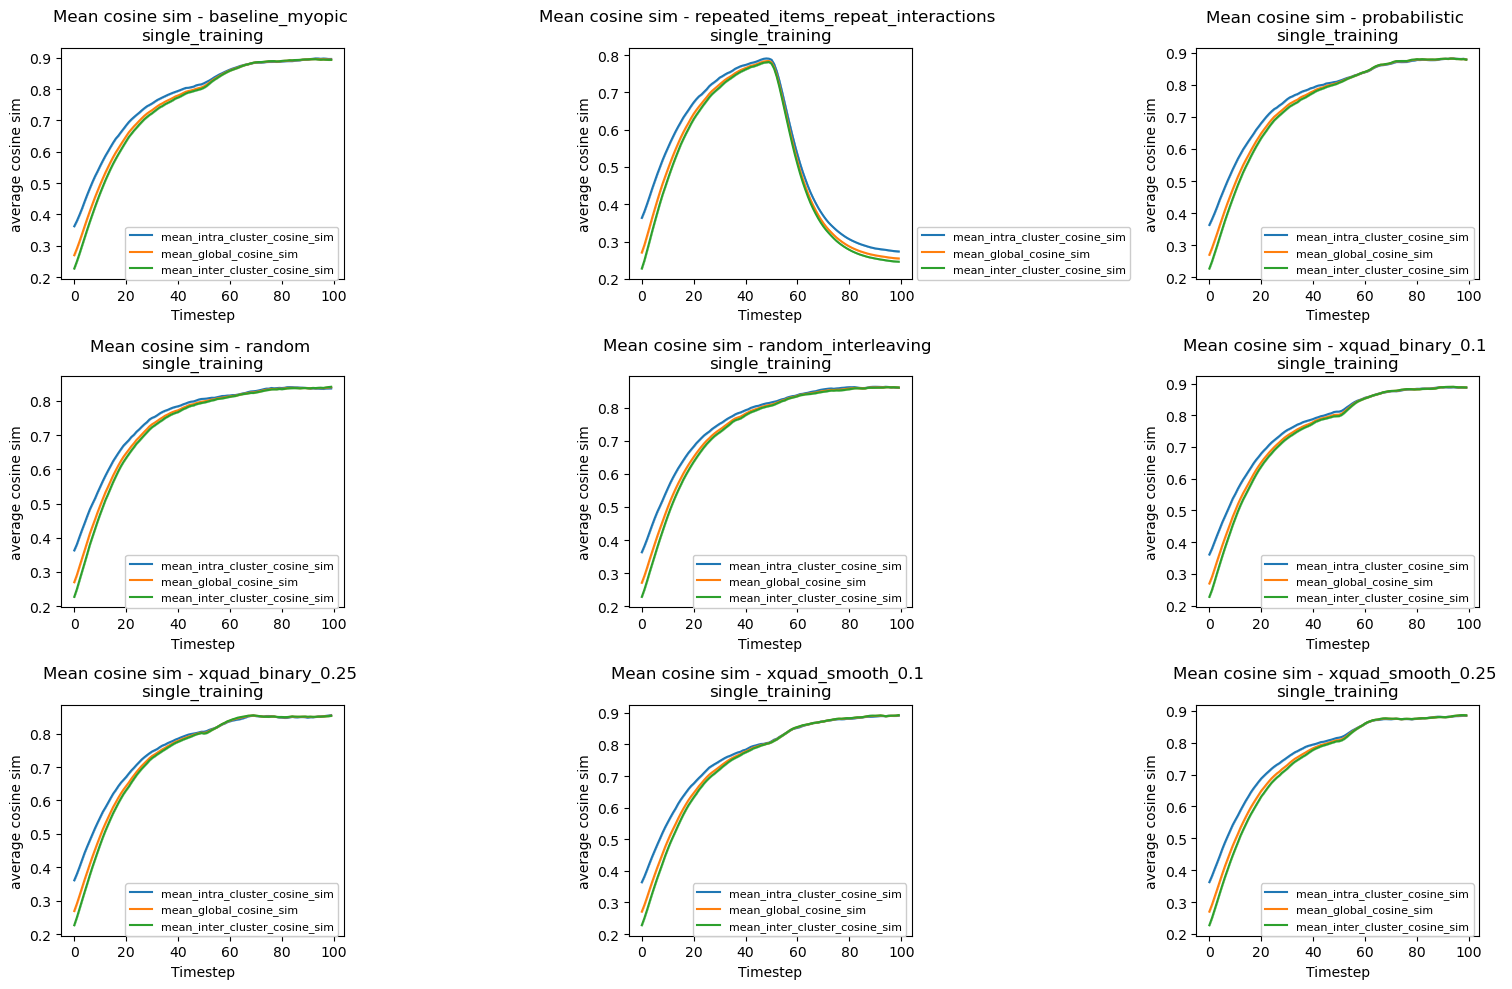

In [13]:
training_type = var_list[1]

title = "Mean cosine sim"
metric_keys = ["mean_intra_cluster_cosine_sim", "mean_global_cosine_sim", "mean_inter_cluster_cosine_sim"]

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[0], [model_key], id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_metric")
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[1], [model_key], id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_metric")
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[2], [model_key], id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_metric")
    
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{title} - {model_key} \n{training_type}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', bbox_to_anchor=(1, 0.25), fontsize="8",)

plt.tight_layout()

Text(0.5, 1.0, 'baseline_myopic')

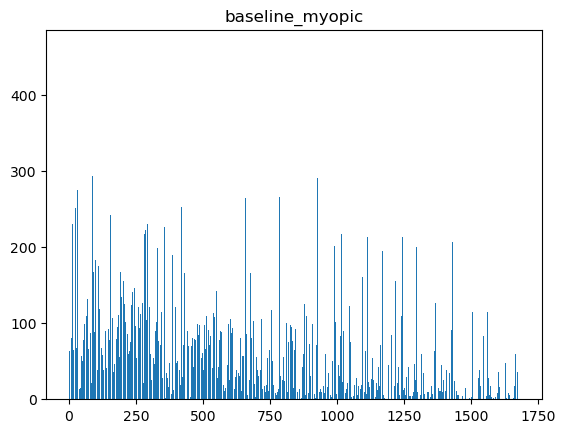

In [14]:
model = model_keys[0]
bm_hist = np.array(all_results['single_training']['interaction_histogram'][model][0])
bm_item_count = np.sum(bm_hist, axis=0)
plt.bar(np.arange(bm_item_count.size), bm_item_count)
plt.title(model)

In [15]:
model_names_readable = {
    'baseline_myopic':'Myopic',
    'repeated_items_repeat_interactions':'Repeatable',
    'probabilistic':'Probabilistic',
    'random':'Random',
    'random_interleaving':'Random Interleaving',
    'xquad_binary_0.1': "Binary XquAD, $\\alpha=0.1$",
    'xquad_binary_0.25': "Binary XquAD, $\\alpha=0.25$",
    'xquad_smooth_0.1': "Smooth XquAD, $\\alpha=0.1$",
    'xquad_smooth_0.25': "Smooth XquAD, $\\alpha=0.25$"
}

def generate_histogram_stats(results):
    dfs = []
    for training_type in ['single_training', 'repeated_training']:
        # df = pd.DataFrame(columns=['max', 'min', 'mean', 'median', 'SD'])
        df = pd.DataFrame(columns=['Max', 'Min', 'Median', 'SD'])
        for m in model_keys:
            curr_results = results[training_type]['interaction_histogram'][m][0]
            curr_results = np.sum(curr_results, axis=0)
            data = {
                'Max':int(np.max(curr_results)),
                'Min': int(np.min(curr_results)),
                # 'mean':np.mean(curr_results),
                'Median':int(np.median(curr_results)),
                'SD':np.around(np.std(curr_results),2)
            }
            df = df.append(pd.DataFrame(data, index=[model_names_readable[m]]))
        dfs.append(df)

    result_dfs = pd.concat([dfs[0],
                                dfs[1],],
                            axis=1,
                            keys=["Single training", "Repeated training"])
    return result_dfs

result_df = generate_histogram_stats(all_results)
result_df

Single training                     \
                                        Max Min Median      SD   
Myopic                                  463   0     35   61.90   
Repeatable                             4345   0      9  198.04   
Probabilistic                           543   0     29   71.09   
Random                                  373   0     18   75.41   
Random Interleaving                     303   0     30   63.57   
Binary XquAD, $\alpha=0.1$              571   0     33   67.76   
Binary XquAD, $\alpha=0.25$             603   0     25   75.28   
Smooth XquAD, $\alpha=0.1$              625   0     33   67.06   
Smooth XquAD, $\alpha=0.25$             668   0     30   71.81   

                            Repeated training                     
                                          Max Min Median      SD  
Myopic                                    527   0     37   60.78  
Repeatable                               4770   0      4  242.66  
Probabilistic                             424   0     36   61.06  
Random                                    380   0     18   75.97  
Random Interleaving                       432   0     34   61.03  
Binary XquAD, $\alpha=0.1$                450   0     37   59.26  
Binary XquAD, $\alpha=0.25$               647   0     37   60.03  
Smooth XquAD, $\alpha=0.1$                475   0     37   59.60  
Smooth XquAD, $\alpha=0.25$               521   0     39   58.77

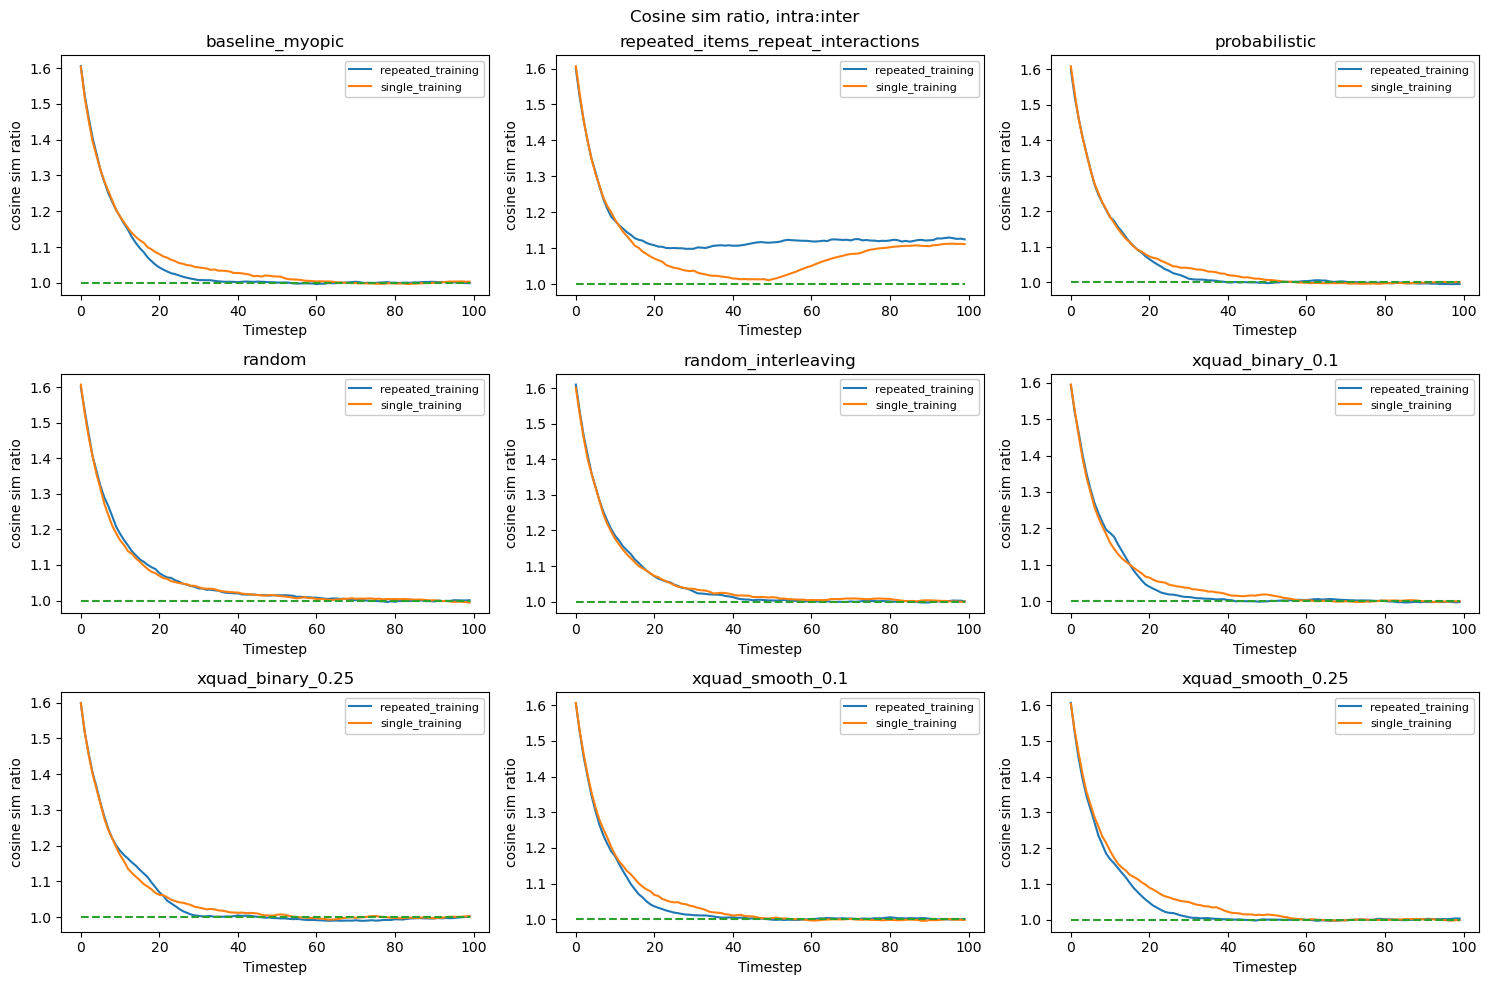

In [16]:
numerator = "mean_intra_cluster_cosine_sim"
denominator = "mean_inter_cluster_cosine_sim"

plot_by = 'ratio'

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    
    if plot_by == "difference":
        graph_metrics_difference_by_axis(curr_ax, all_results[var_list[0]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, normalized=True, label=var_list[0])
        graph_metrics_difference_by_axis(curr_ax, all_results[var_list[1]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, normalized=True, label=var_list[1])
        curr_ax.set_ylabel("cosine sim difference")
        plt.suptitle("Cosine sim difference, intra - inter")
        curr_ax.plot(np.arange(100), np.zeros(100), linestyle='dashed')
    elif plot_by == "ratio":
        graph_metrics_ratio_by_axis(curr_ax, all_results[var_list[0]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label=var_list[0])
        graph_metrics_ratio_by_axis(curr_ax, all_results[var_list[1]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label=var_list[1])
        curr_ax.set_ylabel("cosine sim ratio")
        plt.suptitle("Cosine sim ratio, intra:inter")
        curr_ax.plot(np.arange(100), np.ones(100), linestyle='dashed')
    
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{model_key}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

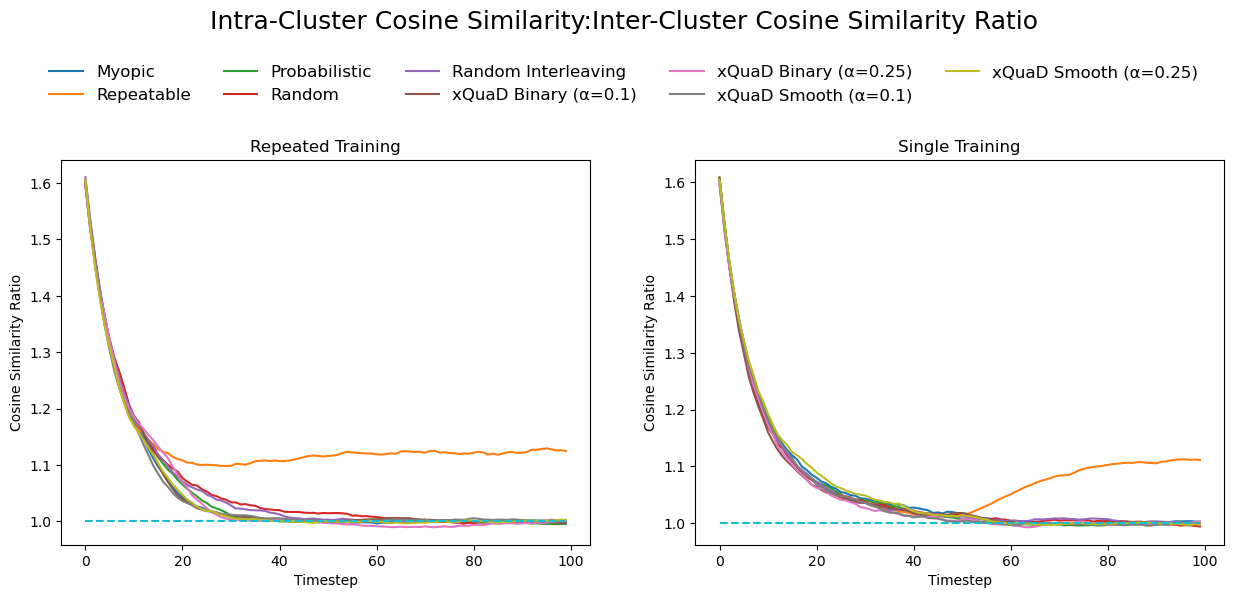

In [17]:
def graph_cos_sim_ratio_by_training(train_results, numerator_key, denominator_key, model_keys, label_map, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_params"):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    legend_lines, legend_names = [], []
    for m in model_keys:
        for idx, training_type in enumerate(['repeated_training', 'single_training']):
            if not isinstance(train_results[training_type][numerator_key][m], np.ndarray):
                train_results[training_type][numerator_key][m] = np.array(train_results[training_type][numerator_key][m])
            if not isinstance(train_results[training_type][denominator_key][m], np.ndarray):
                train_results[training_type][denominator_key][m] = np.array(train_results[training_type][denominator_key][m])
            values = np.divide(train_results[training_type][numerator_key][m][0], train_results[training_type][denominator_key][m][0])
            line, = axs[idx].plot(values)
            legend_names.append(label_map[m])
            legend_lines.append(line)
            axs[idx].set_title(training_to_readable[training_type])
            axs[idx].set_xlabel('Timestep')
            axs[idx].set_ylabel('Cosine Similarity Ratio')
    for ax in axs:
        ax.plot(np.arange(100), np.ones(100), linestyle='dashed')
    fig.legend(legend_lines[::2],
               legend_names[::2],
               loc='upper center',
               fontsize=12,
               frameon=False,
               ncol=5,
               bbox_to_anchor=(.5, 1.1))
    fig.suptitle('Intra-Cluster Cosine Similarity:Inter-Cluster Cosine Similarity Ratio', y=1.18, fontsize=18)

numerator = "mean_intra_cluster_cosine_sim"
denominator = "mean_inter_cluster_cosine_sim"
graph_cos_sim_ratio_by_training(all_results, numerator, denominator, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")

# Graphing `interaction similarity`

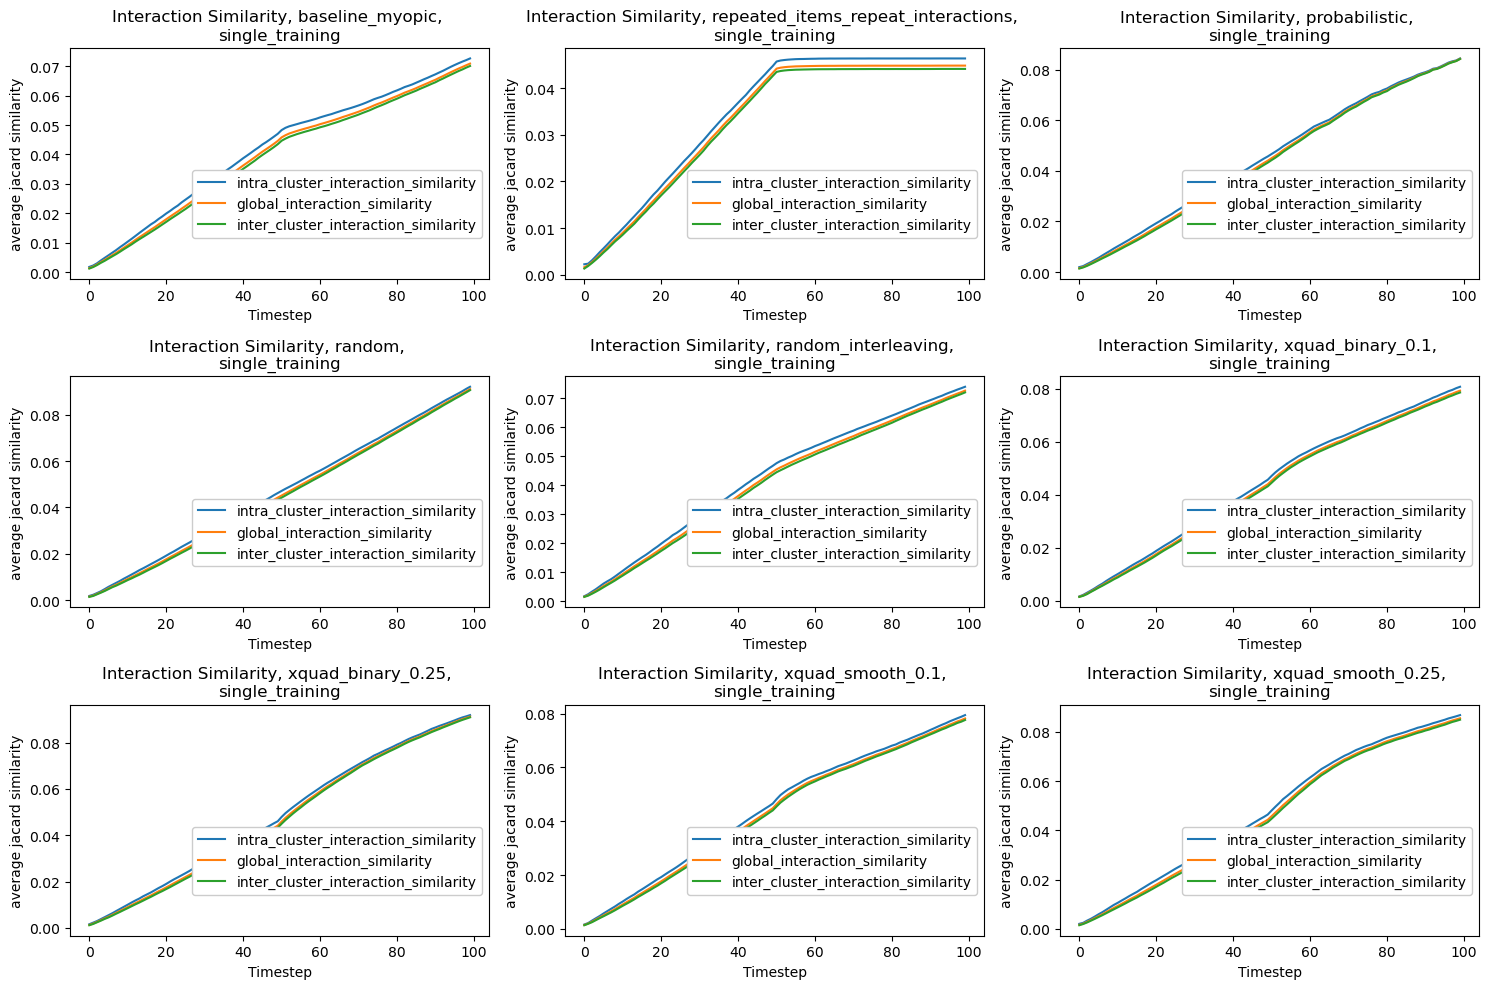

In [18]:
title = "Interaction Similarity"
metric_keys = ["intra_cluster_interaction_similarity", "global_interaction_similarity", "inter_cluster_interaction_similarity"]
training_type = var_list[1]

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[0], [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_metric")
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[1], [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_metric")
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[2], [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_metric")
    
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{title}, {model_key}, \n{training_type}")

plt.tight_layout()

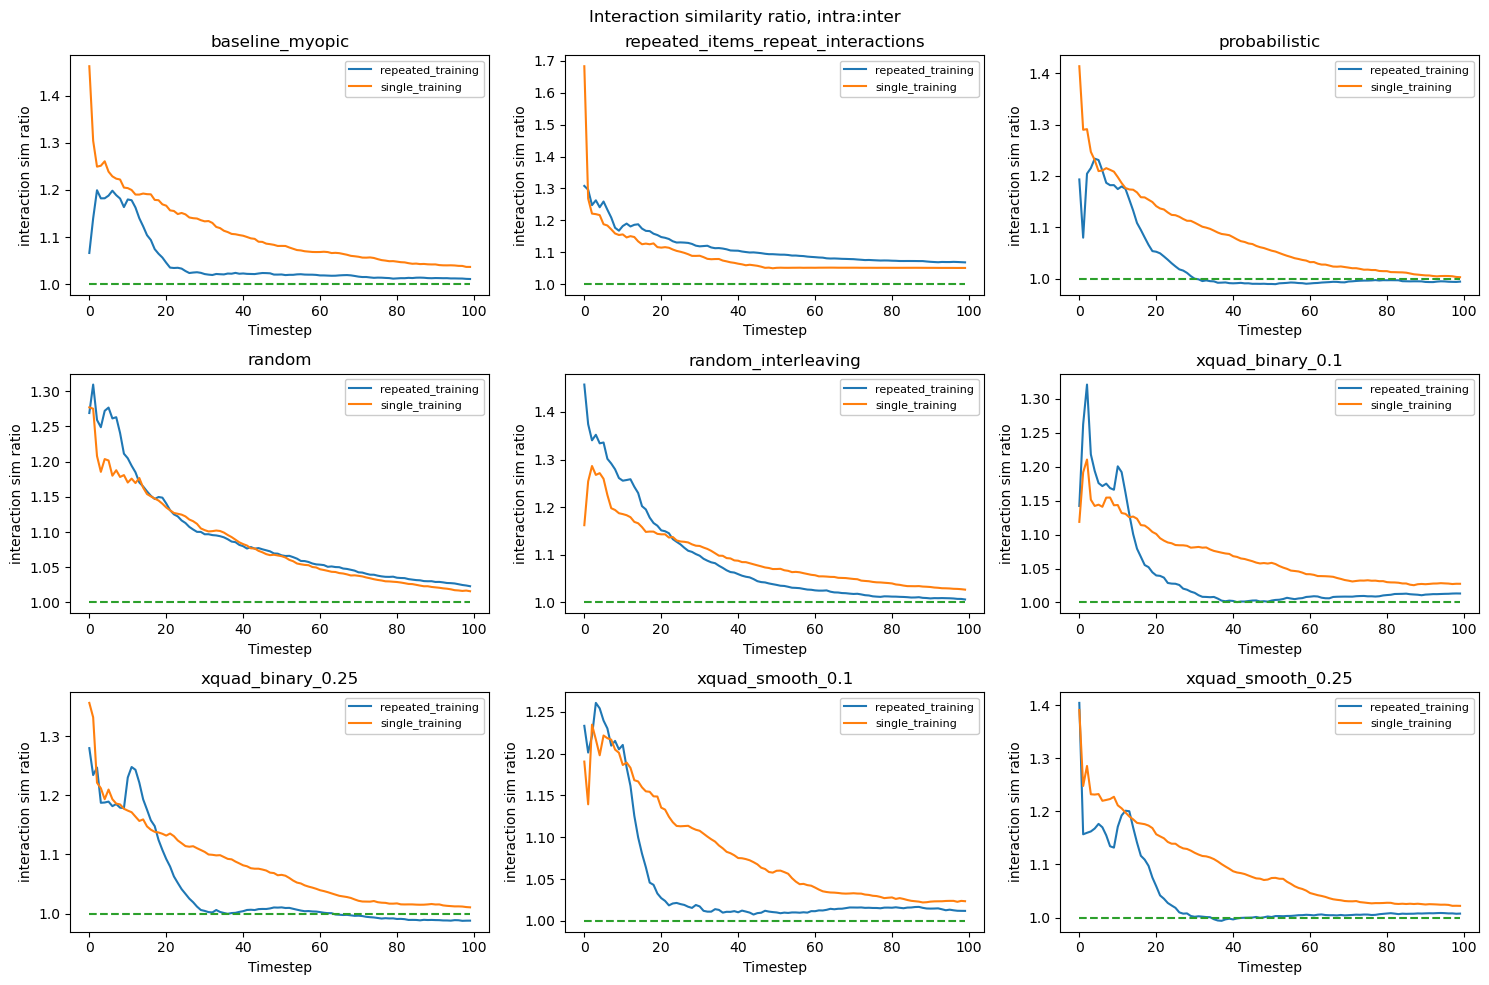

In [19]:
numerator = "intra_cluster_interaction_similarity"
denominator = "inter_cluster_interaction_similarity"

plot_by = "ratio"
# plot_by = "difference"

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    
    if plot_by == "difference":
        graph_metrics_difference_by_axis(curr_ax, all_results[var_list[0]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, normalized=True, label=var_list[0])
        graph_metrics_difference_by_axis(curr_ax, all_results[var_list[1]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, normalized=True, label=var_list[1])
        curr_ax.set_ylabel("interaction sim difference")
        plt.suptitle("Interaction similarity difference, intra - inter")
        curr_ax.plot(np.arange(100), np.zeros(100), linestyle='dashed')
    elif plot_by == "ratio":
        graph_metrics_ratio_by_axis(curr_ax, all_results[var_list[0]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label=var_list[0])
        graph_metrics_ratio_by_axis(curr_ax, all_results[var_list[1]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label=var_list[1])
        curr_ax.set_ylabel("interaction sim ratio")
        plt.suptitle("Interaction similarity ratio, intra:inter")
        curr_ax.plot(np.arange(100), np.ones(100), linestyle='dashed')
    
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{model_key}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

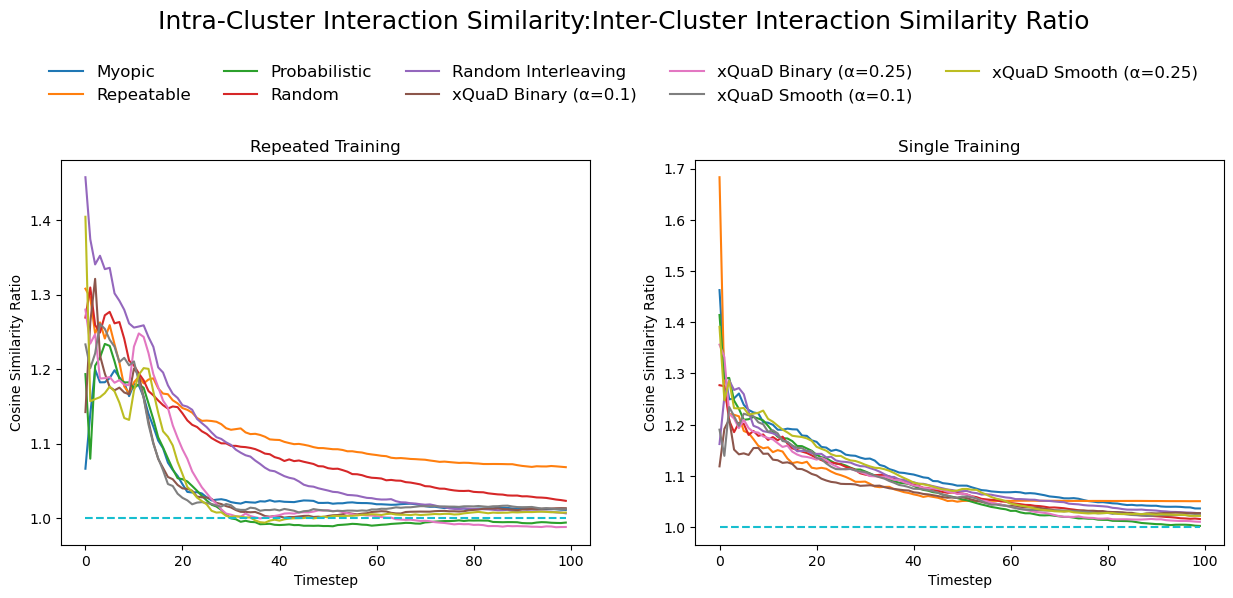

In [20]:
def graph_interaction_sim_ratio_by_training(train_results, numerator_key, denominator_key, model_keys, label_map, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_params"):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    legend_lines, legend_names = [], []
    for m in model_keys:
        for idx, training_type in enumerate(['repeated_training', 'single_training']):
            if not isinstance(train_results[training_type][numerator_key][m], np.ndarray):
                train_results[training_type][numerator_key][m] = np.array(train_results[training_type][numerator_key][m])
            if not isinstance(train_results[training_type][denominator_key][m], np.ndarray):
                train_results[training_type][denominator_key][m] = np.array(train_results[training_type][denominator_key][m])
            values = np.divide(train_results[training_type][numerator_key][m][0], train_results[training_type][denominator_key][m][0])
            line, = axs[idx].plot(values)
            legend_names.append(label_map[m])
            legend_lines.append(line)
            axs[idx].set_title(training_to_readable[training_type])
            axs[idx].set_xlabel('Timestep')
            axs[idx].set_ylabel('Cosine Similarity Ratio')
    for ax in axs:
        ax.plot(np.arange(100), np.ones(100), linestyle='dashed')
    fig.legend(legend_lines[::2],
               legend_names[::2],
               loc='upper center',
               fontsize=12,
               frameon=False,
               ncol=5,
               bbox_to_anchor=(.5, 1.1))
    fig.suptitle('Intra-Cluster Interaction Similarity:Inter-Cluster Interaction Similarity Ratio', y=1.18, fontsize=18)

numerator = "intra_cluster_interaction_similarity"
denominator = "inter_cluster_interaction_similarity"
graph_interaction_sim_ratio_by_training(all_results, numerator, denominator, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")

# Graphing `cluster distance`

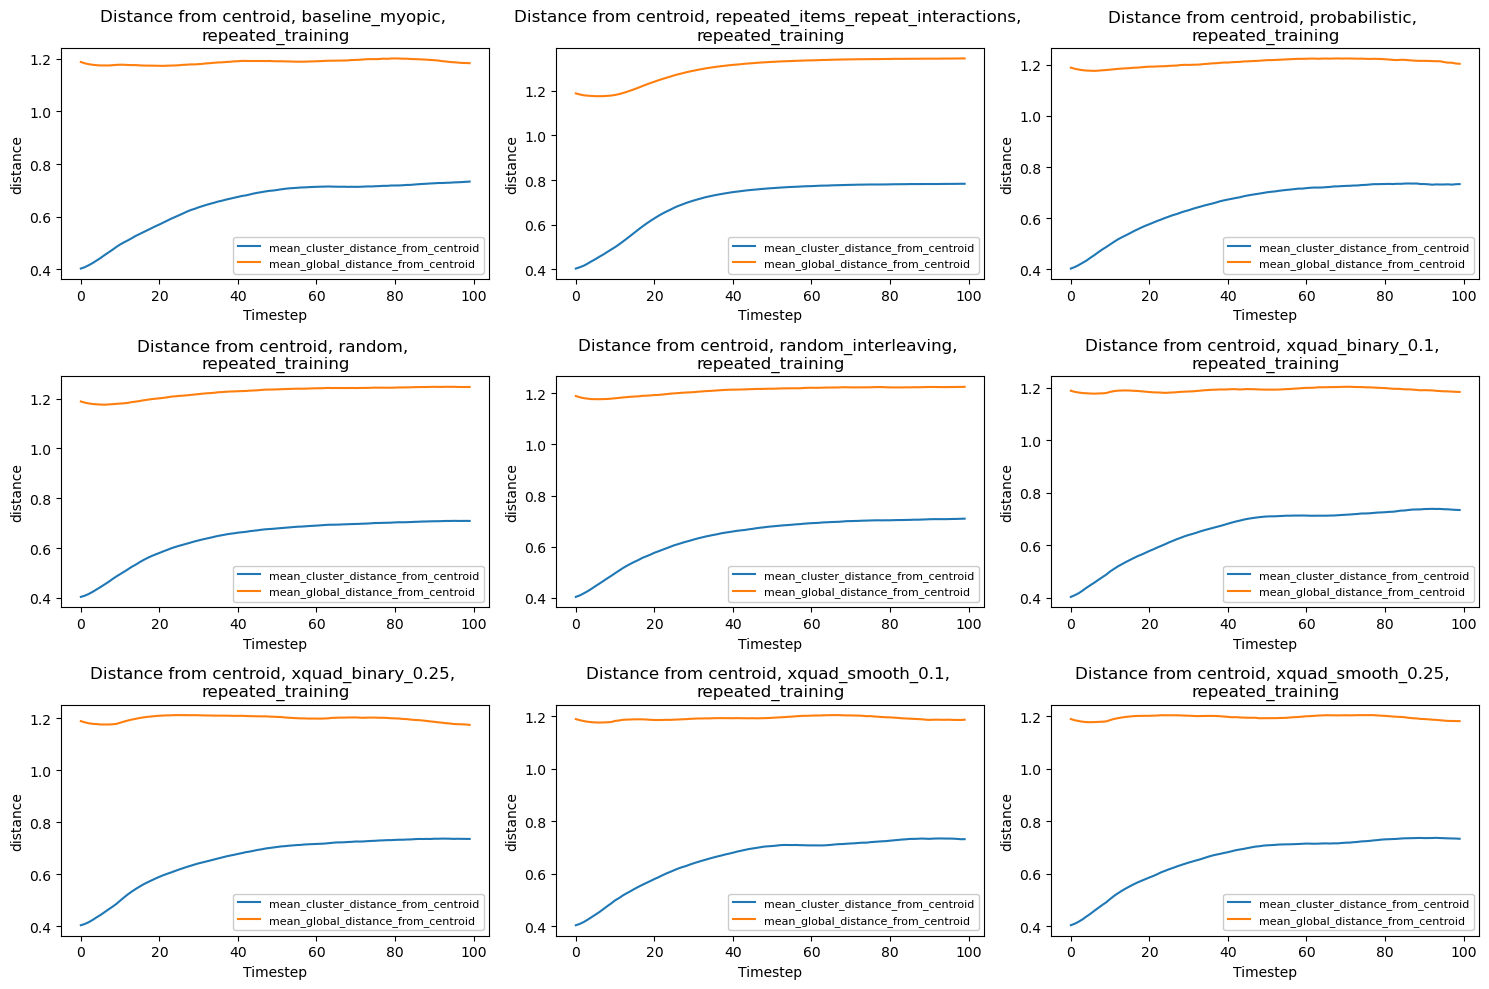

In [21]:
title = "Distance from centroid"
metric_keys = ["mean_cluster_distance_from_centroid", "mean_global_distance_from_centroid"]
training_type = var_list[0]

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[0], [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_metric")
    graph_metrics_by_axis(curr_ax, all_results[training_type], metric_keys[1], [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_metric")
    
    curr_ax.set_ylabel(y_labels[metric_keys[0]])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{title}, {model_key}, \n{training_type}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

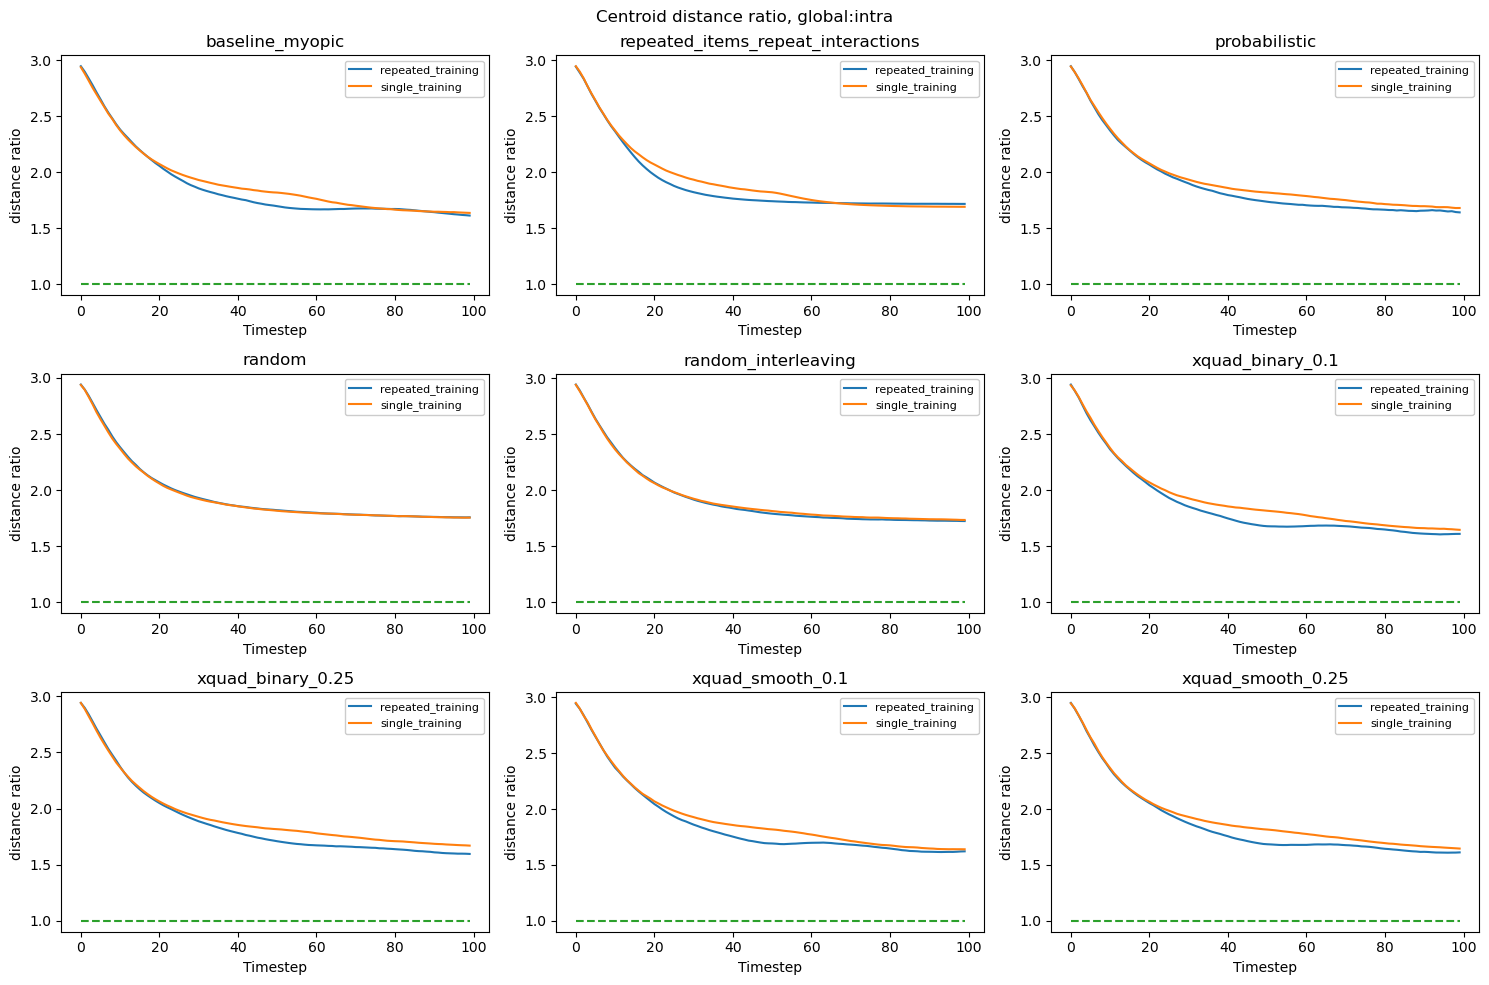

In [22]:
title = "Centroid distance ratio, global/intra-cluster"
numerator = "mean_global_distance_from_centroid"
denominator = "mean_cluster_distance_from_centroid"

plot_by = "ratio"

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    
    if plot_by == "difference":
        graph_metrics_difference_by_axis(curr_ax, all_results[var_list[0]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, normalized=True, label=var_list[0])
        graph_metrics_difference_by_axis(curr_ax, all_results[var_list[1]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, normalized=True, label=var_list[1])
        curr_ax.set_ylabel("distance difference")
        plt.suptitle("Centroid distance difference, global - intra")
        curr_ax.plot(np.arange(100), np.zeros(100), linestyle='dashed')
    elif plot_by == "ratio":
        graph_metrics_ratio_by_axis(curr_ax, all_results[var_list[0]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label=var_list[0])
        graph_metrics_ratio_by_axis(curr_ax, all_results[var_list[1]], numerator, denominator, [model_key], id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, label=var_list[1])
        curr_ax.set_ylabel("distance ratio")
        plt.suptitle("Centroid distance ratio, global:intra")
        curr_ax.plot(np.arange(100), np.ones(100), linestyle='dashed')
    
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{model_key}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

# Graphing `novelty`

In [23]:
def graph_novelty(train_results, metric_key, model_keys, label_map, mean_sigma=0, mult_sd=0, conf_sigma=0, begin_timesteps=0):
    for m in model_keys:
        if not isinstance(train_results[metric_key][m], np.ndarray):
            train_results[metric_key][m] = np.array(train_results[metric_key][m])
        # average across trials and smooth, if necessary
        if mean_sigma > 0:
            values = gaussian_filter1d(train_results[metric_key][m][begin_timesteps:].mean(axis=0), sigma=mean_sigma)
        else:
            values = train_results[metric_key][m][:, begin_timesteps:].mean(axis=0)
        line = plt.plot(values, label=label_map[m])
        line_color = line[0].get_color()
        if mult_sd > 0:
            std = train_results[metric_key][m][:, begin_timesteps:].std(axis=0)
            timesteps = np.arange(len(std))
            low = values - mult_sd * std
            high = values + mult_sd * std
            if conf_sigma > 0:
                low = gaussian_filter1d(low, sigma=conf_sigma)
                high = gaussian_filter1d(high, sigma=conf_sigma)
            plt.fill_between(timesteps, low, high, color = line_color, alpha=0.3)
    plt.legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1.7, 1.0))
    
def graph_novelty_by_axis(ax, train_results, metric_key, model_keys, label_map, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_params", begin_timesteps=50):
    for m in model_keys:
        if not isinstance(train_results[metric_key][m], np.ndarray):
            train_results[metric_key][m] = np.array(train_results[metric_key][m])
        values = train_results[metric_key][m][:, begin_timesteps:].mean(axis=0)
        if label == "by_params":
            line_label = label_map[m]
        elif label == "by_metric":
            line_label = metric_key
        else:
            line_label = label
        line = ax.plot(values, label=line_label)
    ax.legend(facecolor='white', framealpha=1, loc='upper right', bbox_to_anchor=(1, 0.5))
    return ax

Text(0.5, 1.0, 'mean_novelty, single_training')

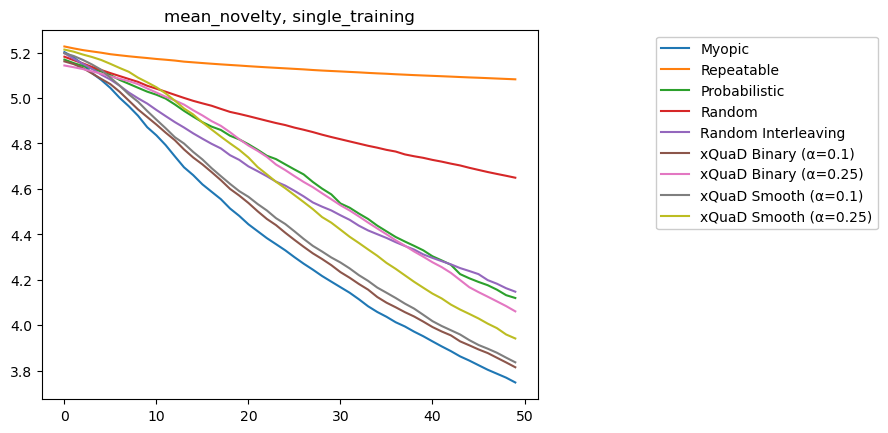

In [24]:
metric_key = "mean_novelty"
training_type = var_list[1]

graph_novelty(all_results[training_type], metric_key, model_keys, id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0, begin_timesteps=50)
plt.title(f"{metric_key}, {training_type}")

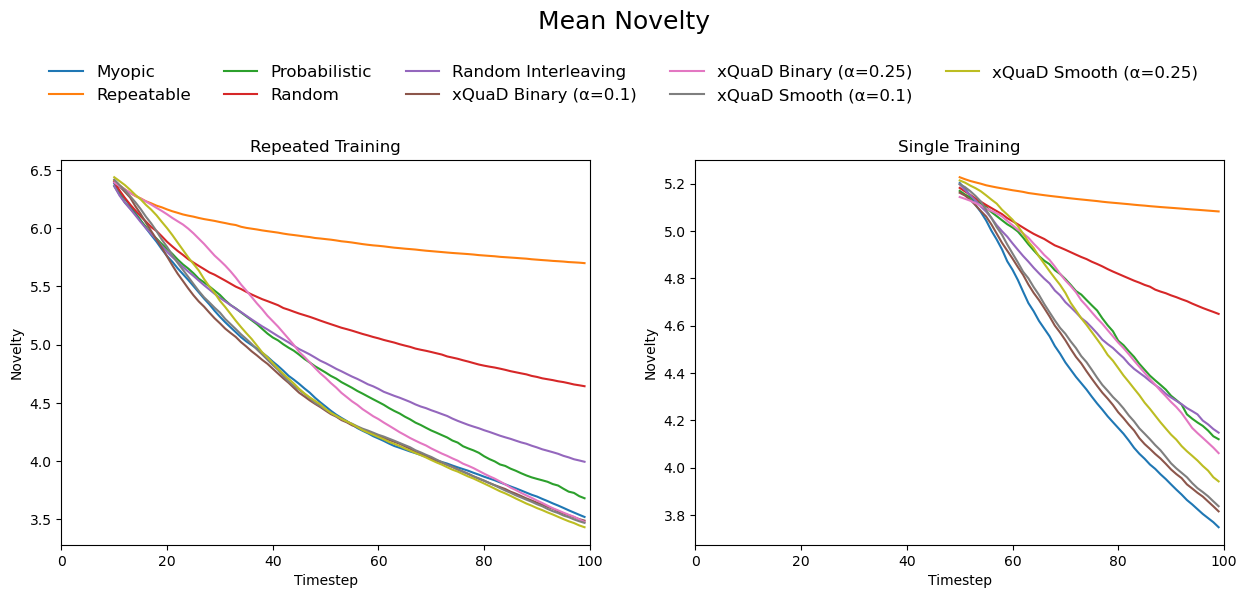

In [25]:
def graph_novelty_by_training(train_results, metric_key, model_keys, label_map, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_params"):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    legend_lines, legend_names = [], []
    for m in model_keys:
        for idx, training_type in enumerate(['repeated_training', 'single_training']):
            if training_type == 'repeated_training':
                if not isinstance(train_results[training_type][metric_key][m], np.ndarray):
                    train_results[training_type][metric_key][m] = np.array(train_results[training_type][metric_key][m])
                values = train_results[training_type][metric_key][m][:, 10:].mean(axis=0)
                line, = axs[idx].plot(np.arange(10,100), values)
                legend_names.append(label_map[m])
                legend_lines.append(line)
            else:
                if not isinstance(train_results[training_type][metric_key][m], np.ndarray):
                    train_results[training_type][metric_key][m] = np.array(train_results[training_type][metric_key][m])
                values = train_results[training_type][metric_key][m][:, 50:].mean(axis=0)
                line, = axs[idx].plot(np.arange(50,100), values)
                legend_names.append(label_map[m])
                legend_lines.append(line)
            axs[idx].set_title(training_to_readable[training_type])
            axs[idx].set_xlabel('Timestep')
            axs[idx].set_ylabel(y_labels[metric_key])
            axs[idx].set_xlim([0, 100])
    fig.legend(legend_lines[::2],
               legend_names[::2],
               loc='upper center',
               fontsize=12,
               frameon=False,
               ncol=5,
               bbox_to_anchor=(.5, 1.1))
    fig.suptitle(metric_to_readable[metric_key], y=1.18, fontsize=18)


metric_key = "mean_novelty"
graph_novelty_by_training(all_results, metric_key, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")

# Graphing `slate topic diversity`

Text(0.5, 1.0, 'mean_slate_topic_diversity - single_training')

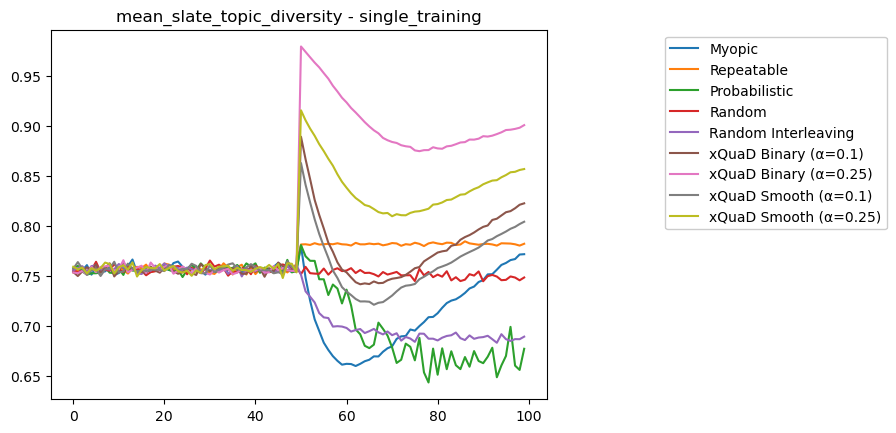

In [26]:
metric_key = "mean_slate_topic_diversity"
training_type = var_list[1]

graph_metrics(all_results[training_type], metric_key, model_keys, id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0)
plt.title(f"{metric_key} - {training_type}")

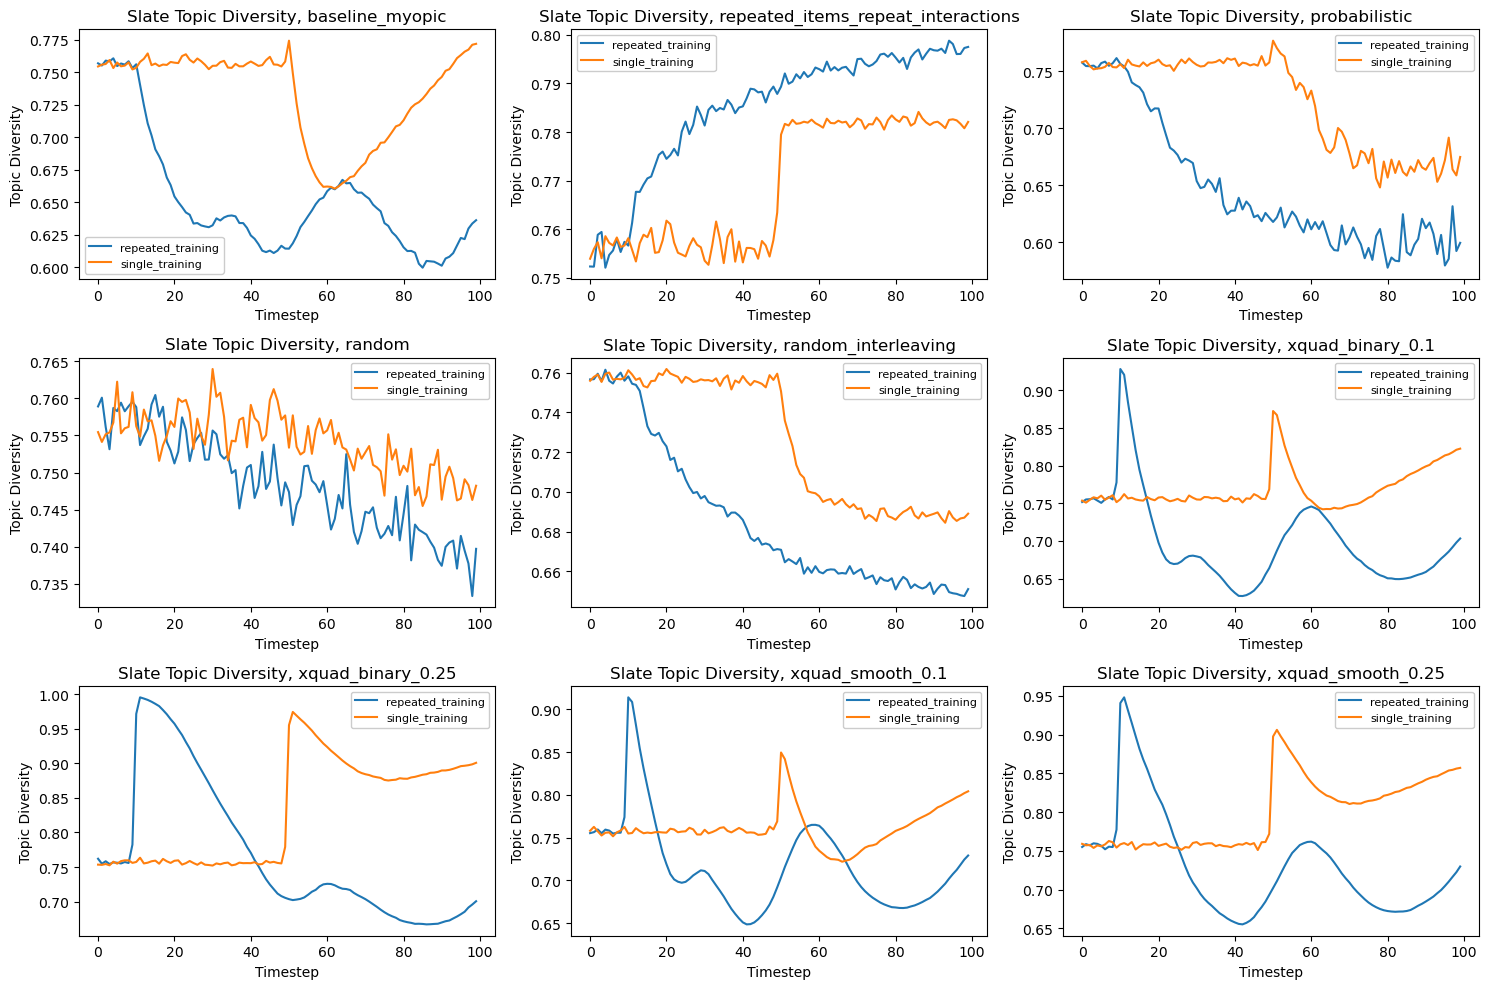

In [27]:
title = "Slate Topic Diversity"
metric = "mean_slate_topic_diversity"

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    
    graph_metrics_by_axis(curr_ax, all_results[var_list[0]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, label=var_list[0])
    graph_metrics_by_axis(curr_ax, all_results[var_list[1]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, label=var_list[1])
    curr_ax.set_ylabel(y_labels[metric])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{title}, {model_key}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

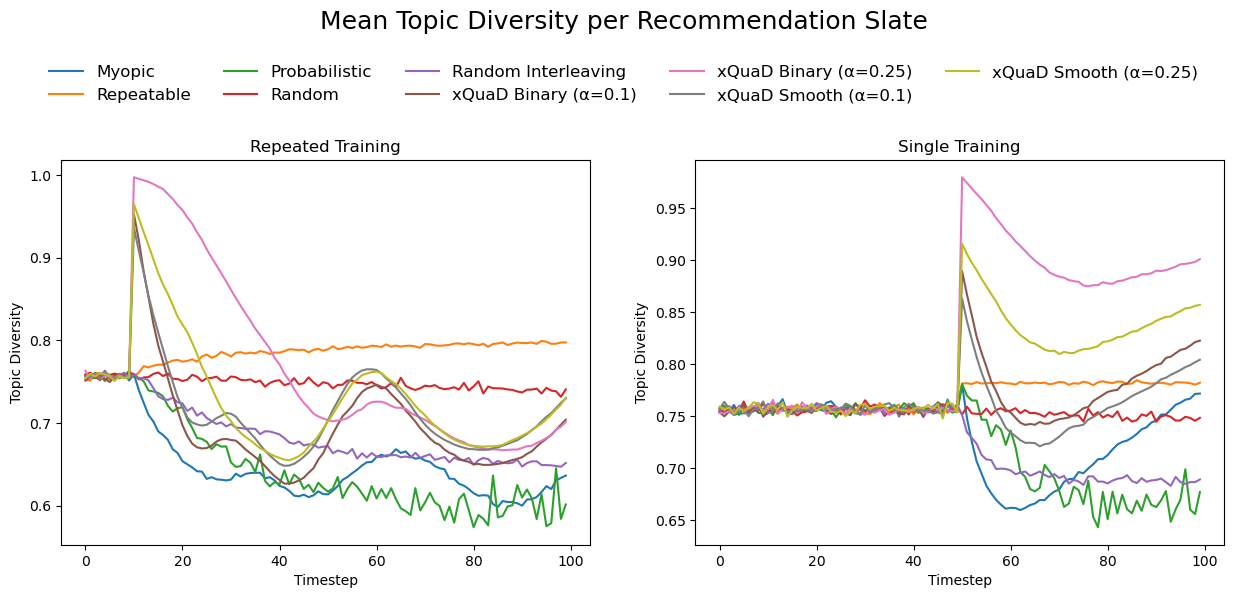

In [28]:
def graph_metrics_by_training(train_results, metric_key, model_keys, label_map, mean_sigma=0, mult_sd=0, conf_sigma=0, label="by_params"):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    legend_lines, legend_names = [], []
    for m in model_keys:
        for idx, training_type in enumerate(['repeated_training', 'single_training']):
            if not isinstance(train_results[training_type][metric_key][m], np.ndarray):
                train_results[training_type][metric_key][m] = np.array(train_results[training_type][metric_key][m])
            values = train_results[training_type][metric_key][m].mean(axis=0)
            line, = axs[idx].plot(values)
            legend_names.append(label_map[m])
            legend_lines.append(line)
            axs[idx].set_title(training_to_readable[training_type])
            axs[idx].set_xlabel('Timestep')
            axs[idx].set_ylabel(y_labels[metric_key])
    fig.legend(legend_lines[::2],
               legend_names[::2],
               loc='upper center',
               fontsize=12,
               frameon=False,
               ncol=5,
               bbox_to_anchor=(.5, 1.1))
    fig.suptitle(metric_to_readable[metric_key], y=1.18, fontsize=18)


metric = "mean_slate_topic_diversity"
graph_metrics_by_training(all_results, metric, model_keys, id_to_readable, mean_sigma=0.5, mult_sd=1.0, conf_sigma=0, label="by_params")

# Graphing `interaction spread`

Text(0.5, 1.0, 'interaction_spread - single_training')

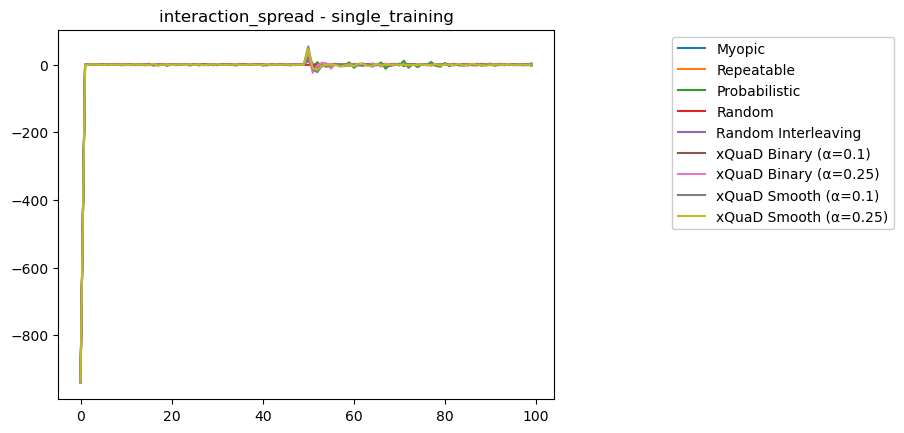

In [29]:
metric_key = "interaction_spread"
training_type = var_list[1]

graph_metrics(all_results[training_type], metric_key, model_keys, id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0)
plt.title(f"{metric_key} - {training_type}")

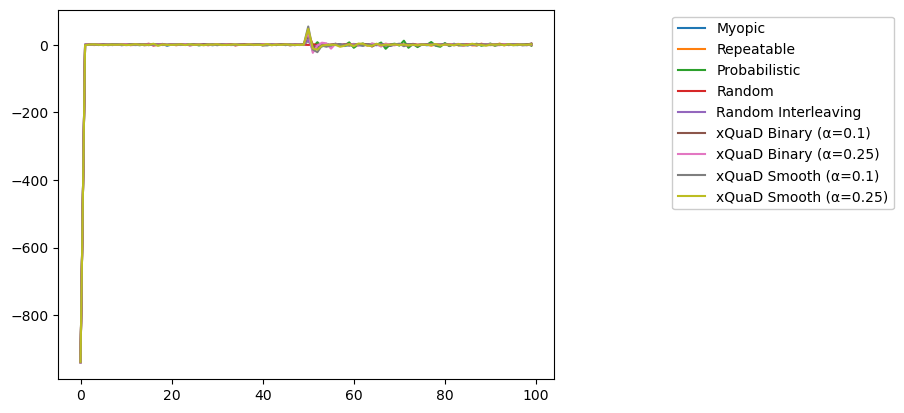

In [30]:
metric_key = "interaction_spread"
training_type = 'single_training'

graph_metrics(all_results[training_type], metric_key, model_keys, id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0)

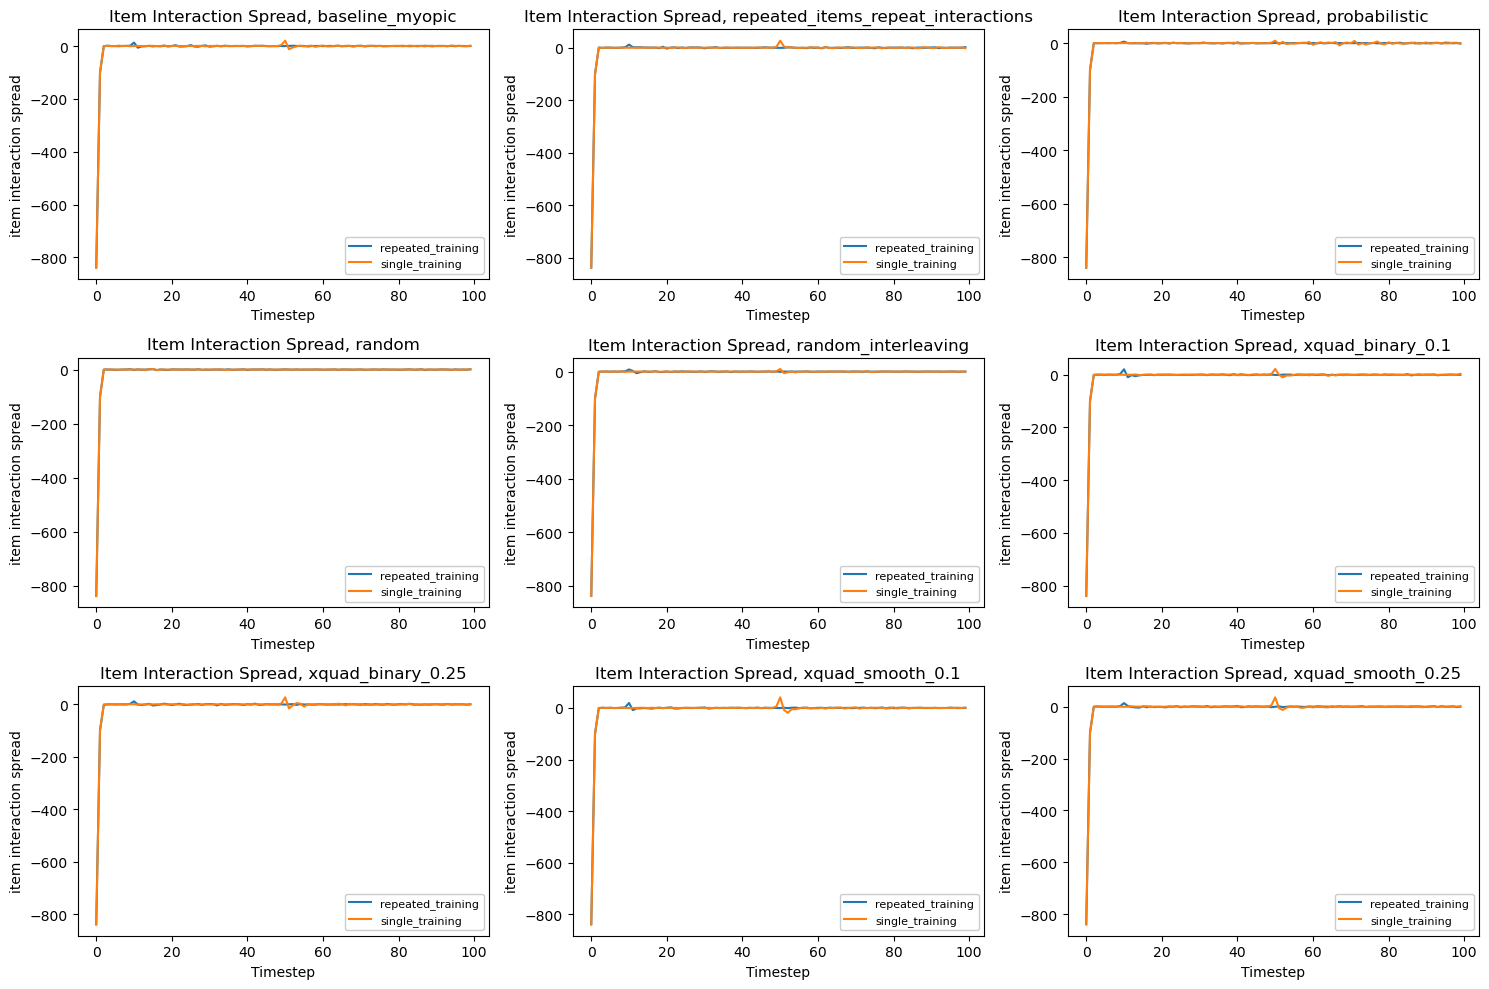

In [31]:
title = "Item Interaction Spread"
metric = "interaction_spread"

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    
    graph_metrics_by_axis(curr_ax, all_results[var_list[0]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, label=var_list[0])
    graph_metrics_by_axis(curr_ax, all_results[var_list[1]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, label=var_list[1])
    curr_ax.set_ylabel(y_labels[metric])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{title}, {model_key}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()

# Graphing `topic interaction spread`

Text(0.5, 1.0, 'topic_interaction_spread - single_training')

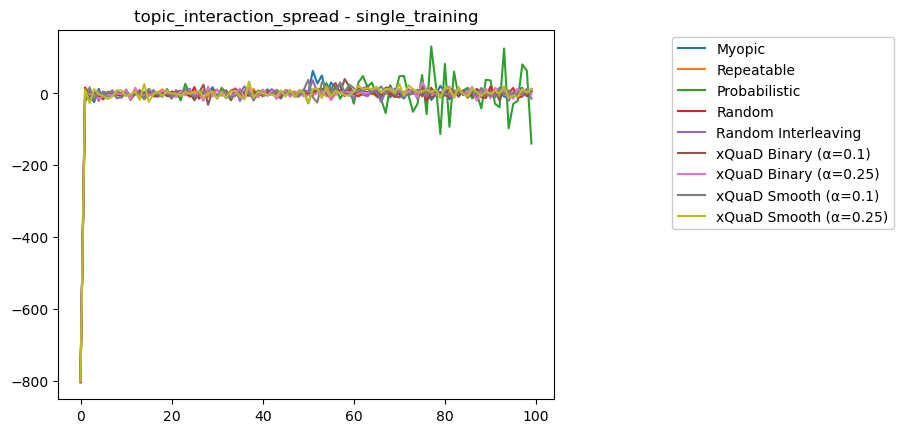

In [32]:
metric_key = "topic_interaction_spread"
# training_type = 'repeated_training'
training_type = var_list[1]

graph_metrics(all_results[training_type], metric_key, model_keys, id_to_readable, mean_sigma=0, mult_sd=0, conf_sigma=0)
plt.title(f"{metric_key} - {training_type}")

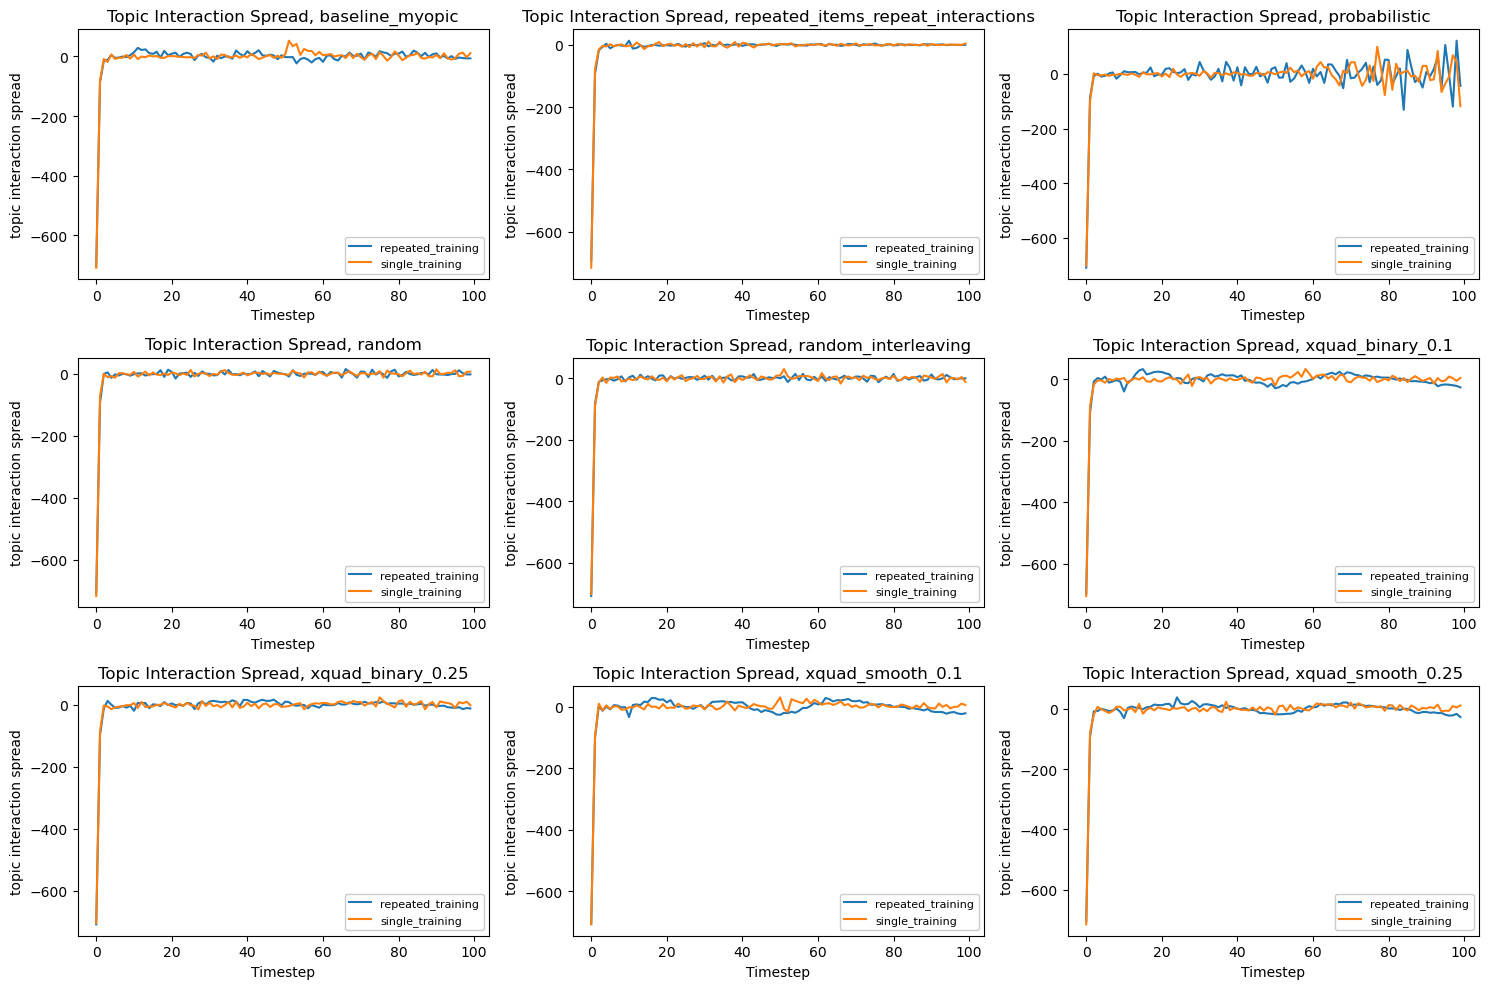

In [33]:
title = "Topic Interaction Spread"
metric = "topic_interaction_spread"

num_plots = len(model_keys)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, model_key in enumerate(model_keys):
    curr_ax = axs[int(i/3), i%3]
    
    graph_metrics_by_axis(curr_ax, all_results[var_list[0]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, label=var_list[0])
    graph_metrics_by_axis(curr_ax, all_results[var_list[1]], metric, [model_key], id_to_readable, mean_sigma=0.5, mult_sd=0, conf_sigma=0, label=var_list[1])
    curr_ax.set_ylabel(y_labels[metric])
    curr_ax.set_xlabel("Timestep")
    curr_ax.set_title(f"{title}, {model_key}")
    curr_ax.legend(facecolor='white', framealpha=1, loc='best', fontsize="8",)

plt.tight_layout()